### Preprocesamiento

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("./data/Variant V.csv")
df.head()


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.1,0.244166,214,3,50,20.662310,15.930899,AA,1922,...,0,INTERNET,8.513914,linux,1,1,0,0,-0.600198,-0.296015
1,0,0.8,0.035690,-1,242,50,6.134627,20.574086,AA,4614,...,0,INTERNET,4.399087,windows,1,1,0,0,-1.406937,2.136468
2,0,0.9,0.030506,-1,95,50,0.001012,-0.591869,AA,1231,...,0,INTERNET,6.989680,linux,0,1,0,0,-0.688785,0.686640
3,0,0.9,0.840711,-1,105,60,0.012292,106.800603,AA,1874,...,0,INTERNET,50.544274,linux,0,1,0,0,-0.865885,-2.078178
4,0,0.7,0.275118,-1,374,60,1.081235,-0.365989,AD,5070,...,0,INTERNET,4.847442,linux,1,1,0,0,-0.339504,-2.032053


In [4]:
# Analisi general
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

fraud_bool
0    988970
1     11030
Name: count, dtype: int64


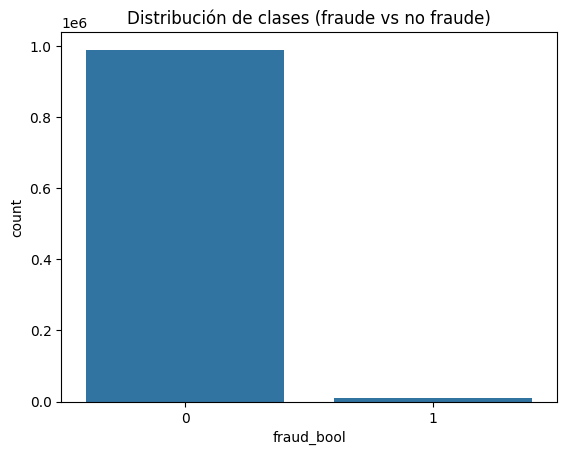

In [5]:
# Análisis del desbalance de clases
sns.countplot(data=df, x="fraud_bool")
plt.title("Distribución de clases (fraude vs no fraude)")
print(df["fraud_bool"].value_counts())

In [6]:
(df == -1).sum().sort_values(ascending=False)

prev_address_months_count           761730
bank_months_count                   246922
current_address_months_count          3381
session_length_in_minutes             2165
credit_risk_score                      397
device_distinct_emails_8w              342
income                                   0
fraud_bool                               0
days_since_request                       0
name_email_similarity                    0
zip_count_4w                             0
velocity_6h                              0
velocity_4w                              0
velocity_24h                             0
bank_branch_count_8w                     0
intended_balcon_amount                   0
payment_type                             0
customer_age                             0
email_is_free                            0
employment_status                        0
date_of_birth_distinct_emails_4w         0
housing_status                           0
has_other_cards                          0
proposed_cr

In [7]:
cols_to_flag = ["prev_address_months_count", "bank_months_count"]

for col in cols_to_flag:
    df[f"{col}_was_missing"] = (df[col] == -1).astype(int)
    df[col] = df[col].replace(-1, 0)

df["current_address_months_count"].replace(-1, df["current_address_months_count"].median(), inplace=True)
df["session_length_in_minutes"].replace(-1, df["session_length_in_minutes"].median(), inplace=True)
df["credit_risk_score"].replace(-1, df["credit_risk_score"].median(), inplace=True)
df["device_distinct_emails_8w"].replace(-1, df["device_distinct_emails_8w"].median(), inplace=True)

In [8]:
# Smote

In [9]:
df.to_csv("data/preprocessed_data.csv", index=False)